In [1]:
from pathlib import Path


# out_file_name = "raw_questions"
# out_file_name = "raw_questions_2"
out_file_name = "raw_questions_wiki_sci_4"


out_dir = Path(f"/home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/{out_file_name}")


# if the directory already exist, raise an error
# out_dir.mkdir(exist_ok=True, parents=True)

In [2]:
import json


formatted_answers = []


answer_files = sorted(list(out_dir.glob("*.txt")))

for p in answer_files:
    try:
        parsed_file = json.loads(p.read_text())
        formatted_answers.append(parsed_file)
    except json.JSONDecodeError as e:
        print(f"cant decode: {p}, {e}")

print(f"parsed {len(formatted_answers)} / {len(answer_files)} files")

cant decode: /home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/raw_questions_wiki_sci_4/cluster-round-100-630509.txt, Unterminated string starting at: line 31 column 19 (char 1451)
cant decode: /home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/raw_questions_wiki_sci_4/cluster-round-101-761479.txt, Unterminated string starting at: line 13 column 12 (char 843)
cant decode: /home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/raw_questions_wiki_sci_4/cluster-round-106-376510.txt, Expecting ',' delimiter: line 10 column 7 (char 547)
cant decode: /home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/raw_questions_wiki_sci_4/cluster-round-139-909648.txt, Expecting ',' delimiter: line 22 column 65 (char 980)
cant decode: /home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/raw_questions_wiki_sci_4/cluster-round-154-711863.txt, Expecting ',' delimiter: line 10 column 7 (char 490)
cant decode: /home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/raw_questions_wiki_s

In [3]:
import pandas as pd
import json
from pathlib import Path

# Get a sorted list of all ".txt" files in the directory
answer_files = sorted(list(out_dir.glob("*.txt")))

failed_reads = 0
data_list = []

# Loop through each file
for p in answer_files:
    try:
        
        
        # Load file content with json.loads
        parsed_file = json.loads(p.read_text())
        

        for q in parsed_file["questions"]:
            data_list.append({
                "id": None,  # You'll need to decide how you want to generate the IDs
                "prompt": q["question"],
                "A": q["A"],
                "B": q["B"],
                "C": q["C"],
                "D": q["D"],
                "E": q["E"],
                "answer": q["answer"],
            })

    except Exception as e:
        # print(f"Failed reading file: {p.name}. Error: {e}")
        failed_reads += 1

print(f"Failed reads: {failed_reads}")

# Convert data_list into a dataframe
df = pd.DataFrame(data_list)

# Assign unique IDs to each row
df["id"] = range(1, len(df) + 1)



Failed reads: 153


In [4]:
# convert prompt	A	B	C	D	E	answer	 columns to string
df["prompt"] = df["prompt"].astype(str)
df["A"] = df["A"].astype(str)
df["B"] = df["B"].astype(str)
df["C"] = df["C"].astype(str)
df["D"] = df["D"].astype(str)
df["E"] = df["E"].astype(str)
df["answer"] = df["answer"].astype(str)

In [5]:
df

,id,prompt,A,B,C,D,E,answer
0,1,What is the formula of monalkylphosphinic acids?,R2PO2H,OP(OH)(H)R,R2−nHnPO2H,(HOCH2)2PO2H,H(HO)P(O)CH2CH2C(O)NH2,B
1,2,What is the role of dialkylphosphinic acids in...,To replace both P-H bonds in the parent hypoph...,To add to Michael acceptors,To extract metals from ores,To react with formaldehyde to give (HOCH2)2PO2H,To purify metals using complexing agents,C
2,3,What are the organic substituents in dialkylph...,Branched alkyl or aryl groups,Methyl groups,Cyanex groups,Hypophosphorous acid,RO-P linkage,A
3,4,What is the relation between dithiodialkyphosp...,They have the same formula,They are used as complexing agents in the puri...,They have similar hydrolysis properties,They both contain phosphorus,They have a direct C-P bond,C
4,5,What compound is associated with the formula H...,Phosphinic acid,Monalkylphosphinic acid,Dialkylphosphinic acid,Dithiodialkyphosphinic acid,Phosphinate,E
...,...,...,...,...,...,...,...,...
27149,27150,What is the function of pyrithiamine deaminase?,To catalyze the conversion of pyrithiamine to ...,To convert pyrithiamine to NH3,To hydrolyze beta-hydroxyethyl groups in pyrit...,To break carbon-nitrogen bonds in cyclic amidines,To synthesize 1-(4-hydroxy-2-methylpyrimid-5-y...,C
27150,27151,What is the systematic name of pyrithiamine de...,1-(4-amino-2-methylpyrimid-5-ylmethyl)-3-(beta...,Pyrithiamine bromide aminohydrolase,Pyrithiamine deaminase,Hydroxyethyl pyrithiamine aminohydrolase,2-Methylpyridinium bromide aminohydrolase,A
27151,27152,What are the substrates of pyrithiamine deamin...,1-(4-amino-2-methylpyrimid-5-ylmethyl)-3-(beta...,1-(4-amino-2-methylpyrimid-5-ylmethyl)-3-(beta...,1-(4-amino-2-methylpyrimid-5-ylmethyl)-3-(beta...,1-(4-hydroxy-2-methylpyrimid-5-ylmethyl)-3-(be...,1-(4-hydroxy-2-methylpyrimid-5-ylmethyl)-3-(be...,C
27152,27153,What enzyme class does pyrithiamine deaminase ...,Hydrolases that act on carbon-nitrogen bonds o...,Hydrolases that act on peptide bonds,Lyases that act on carbon-nitrogen bonds,Oxidoreductases that act on carbon-nitrogen bonds,Transferases that act on carbon-nitrogen bonds,A


In [6]:
# is there any none in the df?
df.isna().sum()

id        0
prompt    0
A         0
B         0
C         0
D         0
E         0
answer    0
dtype: int64

In [7]:
df['answer'].value_counts()

answer
A                                                                                   9592
B                                                                                   6923
C                                                                                   4995
D                                                                                   3360
E                                                                                   2219
                                                                                    ... 
4.5 m                                                                                  1
Rad50                                                                                  1
11.6 days                                                                              1
Indicates abundance anomalies of silicon, strontium, and mercury in the spectrum       1
A and C                                                                                1
Name: count, L

In [8]:


df = df[df['answer'].isin(['A', 'B', 'C', 'D', 'E'])].reset_index(drop=True)
df['answer'].value_counts()

answer
A    9592
B    6923
C    4995
D    3360
E    2219
Name: count, dtype: int64

In [9]:
df

,id,prompt,A,B,C,D,E,answer
0,1,What is the formula of monalkylphosphinic acids?,R2PO2H,OP(OH)(H)R,R2−nHnPO2H,(HOCH2)2PO2H,H(HO)P(O)CH2CH2C(O)NH2,B
1,2,What is the role of dialkylphosphinic acids in...,To replace both P-H bonds in the parent hypoph...,To add to Michael acceptors,To extract metals from ores,To react with formaldehyde to give (HOCH2)2PO2H,To purify metals using complexing agents,C
2,3,What are the organic substituents in dialkylph...,Branched alkyl or aryl groups,Methyl groups,Cyanex groups,Hypophosphorous acid,RO-P linkage,A
3,4,What is the relation between dithiodialkyphosp...,They have the same formula,They are used as complexing agents in the puri...,They have similar hydrolysis properties,They both contain phosphorus,They have a direct C-P bond,C
4,5,What compound is associated with the formula H...,Phosphinic acid,Monalkylphosphinic acid,Dialkylphosphinic acid,Dithiodialkyphosphinic acid,Phosphinate,E
...,...,...,...,...,...,...,...,...
27084,27150,What is the function of pyrithiamine deaminase?,To catalyze the conversion of pyrithiamine to ...,To convert pyrithiamine to NH3,To hydrolyze beta-hydroxyethyl groups in pyrit...,To break carbon-nitrogen bonds in cyclic amidines,To synthesize 1-(4-hydroxy-2-methylpyrimid-5-y...,C
27085,27151,What is the systematic name of pyrithiamine de...,1-(4-amino-2-methylpyrimid-5-ylmethyl)-3-(beta...,Pyrithiamine bromide aminohydrolase,Pyrithiamine deaminase,Hydroxyethyl pyrithiamine aminohydrolase,2-Methylpyridinium bromide aminohydrolase,A
27086,27152,What are the substrates of pyrithiamine deamin...,1-(4-amino-2-methylpyrimid-5-ylmethyl)-3-(beta...,1-(4-amino-2-methylpyrimid-5-ylmethyl)-3-(beta...,1-(4-amino-2-methylpyrimid-5-ylmethyl)-3-(beta...,1-(4-hydroxy-2-methylpyrimid-5-ylmethyl)-3-(be...,1-(4-hydroxy-2-methylpyrimid-5-ylmethyl)-3-(be...,C
27087,27153,What enzyme class does pyrithiamine deaminase ...,Hydrolases that act on carbon-nitrogen bonds o...,Hydrolases that act on peptide bonds,Lyases that act on carbon-nitrogen bonds,Oxidoreductases that act on carbon-nitrogen bonds,Transferases that act on carbon-nitrogen bonds,A


['B' 'C' 'A' 'E' 'D']


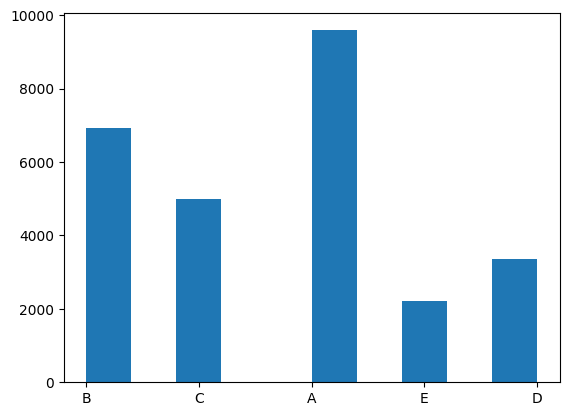

In [11]:
import matplotlib.pyplot as plt

print(df['answer'].unique())


# df = df[(df['answer'] == 'A') && (df['answer'] == 'B') && (df['answer'] == 'C') && (df['answer'] == 'D') && (df['answer'] == 'E')]
df = df[(df['answer'] == 'A') | (df['answer'] == 'B') | (df['answer'] == 'C') | (df['answer'] == 'D') | (df['answer'] == 'E')].reset_index(drop=True)



plt.hist(df['answer'].values);

In [12]:
import pandas as pd
import numpy as np

def shuffle_answers(df):
    # Shuffle answers
    answers = ['A', 'B', 'C', 'D', 'E']

    for idx, row in df.iterrows():
        current_answer = row['answer']
        
        # Choose a new answer that's different from the current answer
        new_answer = np.random.choice([ans for ans in answers if ans != current_answer])
        
        # Swap the text from the current answer to the new answer and vice-versa
        df.at[idx, current_answer], df.at[idx, new_answer] = df.at[idx, new_answer], df.at[idx, current_answer]
        
        # Update the answer column with the new answer
        df.at[idx, 'answer'] = new_answer


    return df

In [13]:

df = shuffle_answers(df)
df = shuffle_answers(df)


['C' 'A' 'E' 'B' 'D']


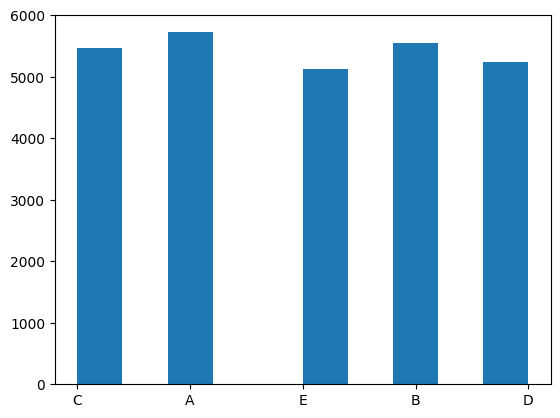

In [14]:
import matplotlib.pyplot as plt

print(df['answer'].unique())


# df = df[(df['answer'] == 'A') && (df['answer'] == 'B') && (df['answer'] == 'C') && (df['answer'] == 'D') && (df['answer'] == 'E')]
df = df[(df['answer'] == 'A') | (df['answer'] == 'B') | (df['answer'] == 'C') | (df['answer'] == 'D') | (df['answer'] == 'E')].reset_index(drop=True)



plt.hist(df['answer'].values);

In [15]:
out_file_name

'raw_questions_wiki_sci_4'

In [16]:
out_path = f"../../data/data_dumps/more_questions/more_questions_{out_file_name}.csv"
print(out_path)
df.to_csv(out_path)

../../data/data_dumps/more_questions/more_questions_raw_questions_wiki_sci_4.csv
